In [1]:
import xarray as xr

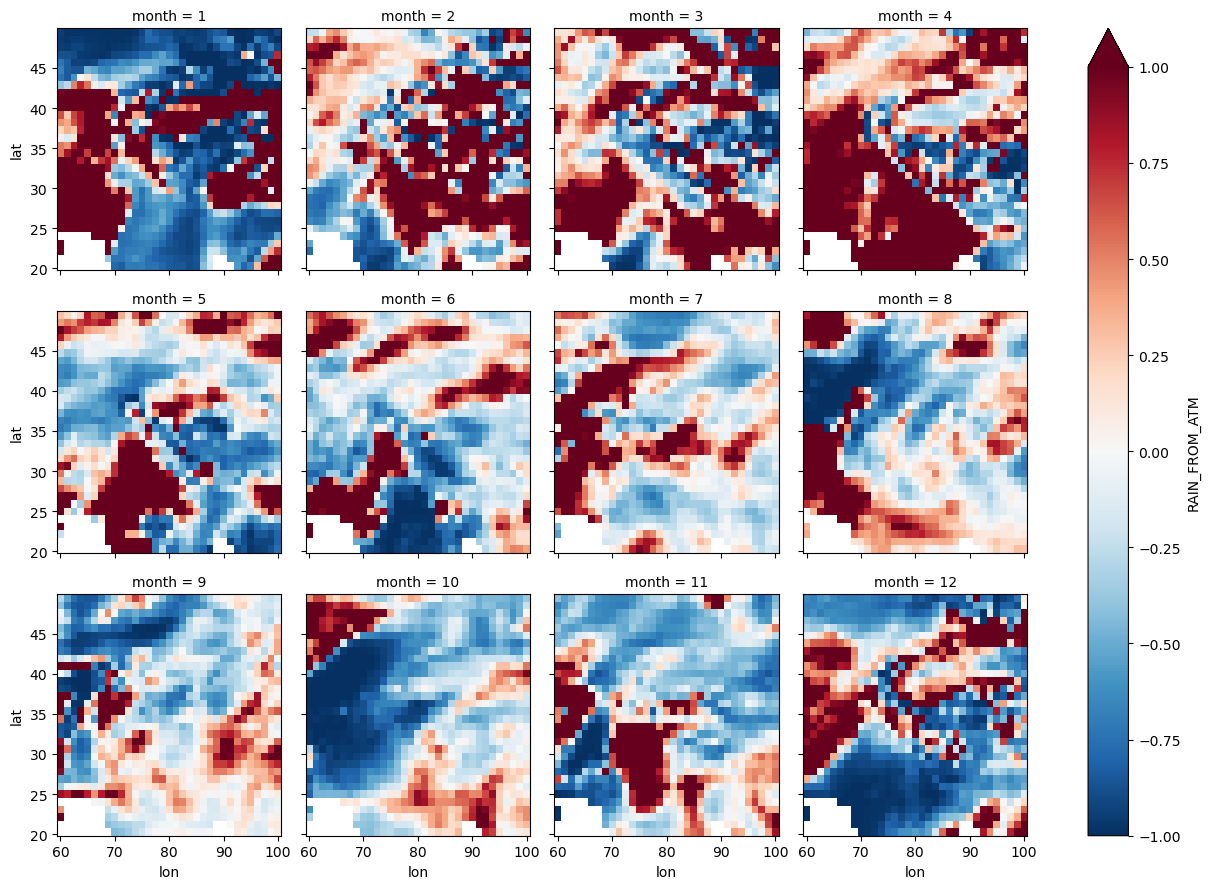

In [2]:
baseline = xr.open_dataset("CESM2.NOI.001.clm.h0.1981_2014.selparam.merged.nc").RAIN_FROM_ATM*86400*30
baseline = baseline.where((baseline.lon >= 60) & (baseline.lon <= 100) & (baseline.lat >= 20) & (baseline.lat <= 50), drop=True) 
baseline["time"] = baseline.time.astype("datetime64[ns]")
baseline = baseline.groupby('time.month').mean()

irrigation = xr.open_dataset("CESM2.IRR.001.clm.h0.1981_2014.selparam.merged.nc").RAIN_FROM_ATM*86400*30
irrigation = irrigation.where((irrigation.lon >= 60) & (irrigation.lon <= 100) & (irrigation.lat >= 20) & (irrigation.lat <= 50), drop=True) 
irrigation["time"] = irrigation.time.astype("datetime64[ns]")
irrigation = irrigation.groupby('time.month').mean()

(baseline/irrigation -1).plot(x="lon", y="lat", col="month", col_wrap=4, vmax= 1)

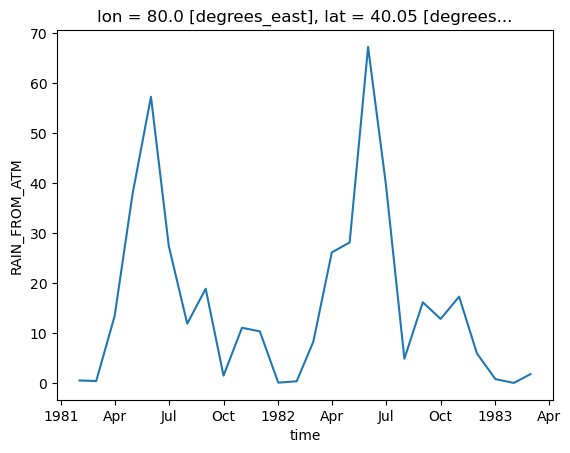

In [11]:
baseline = xr.open_dataset("CESM2.NOI.001.clm.h0.1981_2014.selparam.merged.nc").RAIN_FROM_ATM*86400*30
baseline = baseline.where((baseline.lon >= 60) & (baseline.lon <= 100) & (baseline.lat >= 20) & (baseline.lat <= 50), drop=True) 
baseline["time"] = baseline.time.astype("datetime64[ns]")

baseline.where(baseline['time.year'] > 1970, drop=True).sel(lat = 40, lon = 80, method = "nearest").plot()